# Example Notebook for Using the `gillepsie` package

This notebook shows how to use the `gillespie` package to simulate a simple chemical reaction. 

In [8]:
# TODO: finish this notebook
import gillespie
s = gillespie.Simulation(
    rates={
        "a_T": 0.2,
        "mu_T": 0.01,
        "pi_T": 0.1,
        "mu_Q": 0.01,
        "alpha_s": 0.1,
        "k_s": 0.1,
        "mu_s": 0.01,
        "alpha_R": 0.1,
        "k_R": 0.1,
        "mu_R": 0.01,
        "beta": 0.1,
        "mu_c": 0.04,
        "pi_R": 0.1,
    }
)
res = s.simulate(
    {
        "mRNA_TF": 10,
        "protein_TF": 0,
        "mRNA_T": 10,
        "protein_T": 0,
        "miRNA": 0,
        "complex": 0,
    }
)

In [9]:
# plot all the species according to time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
time = np.array(res[0])
species = res[1]


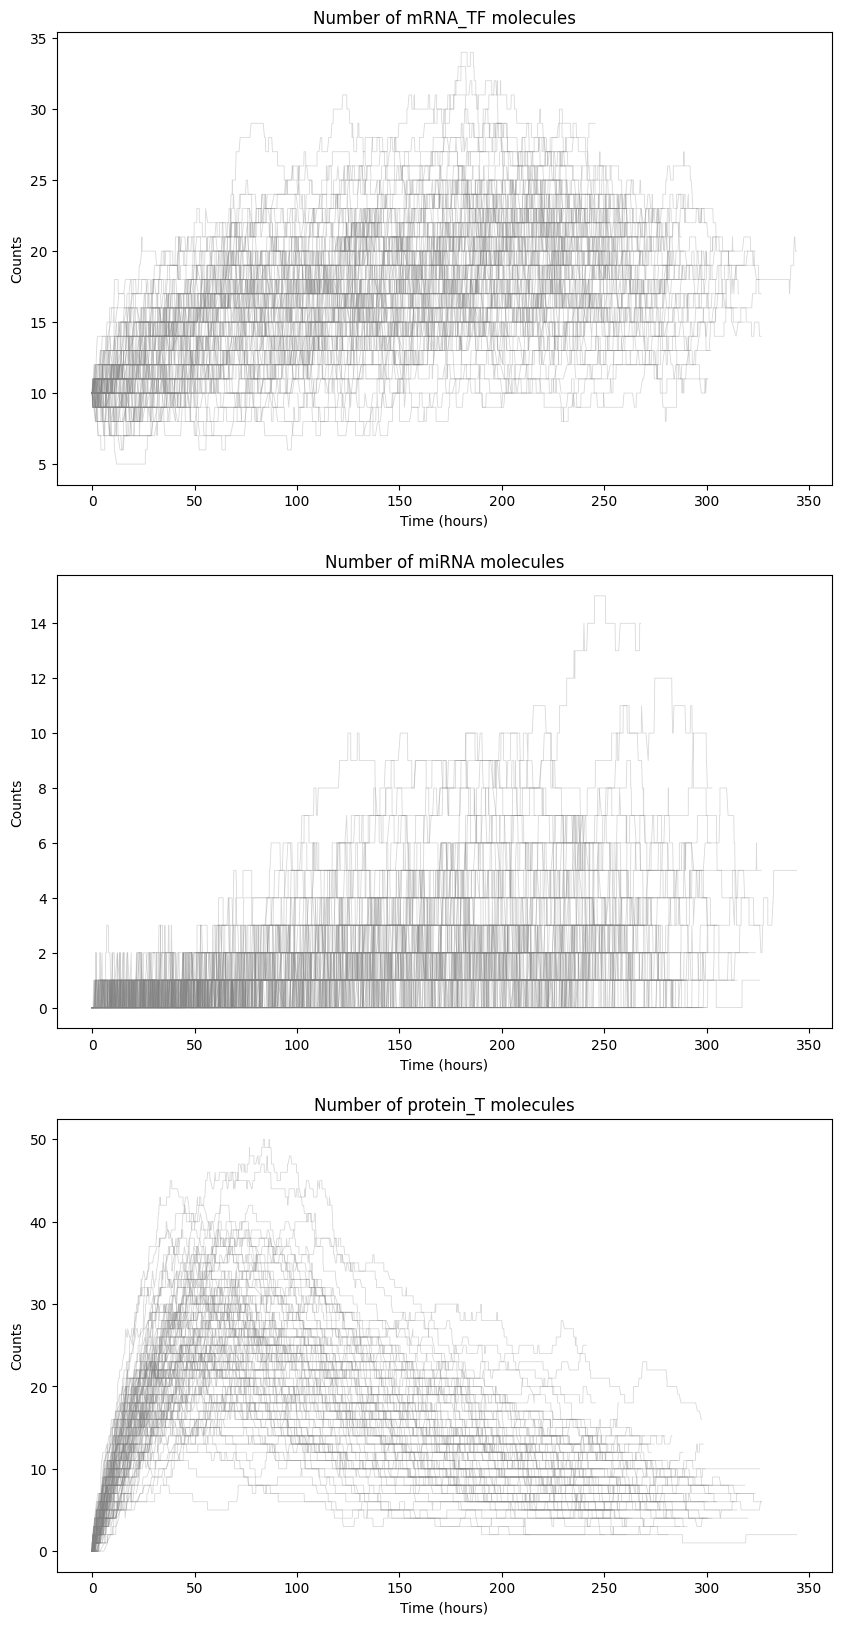

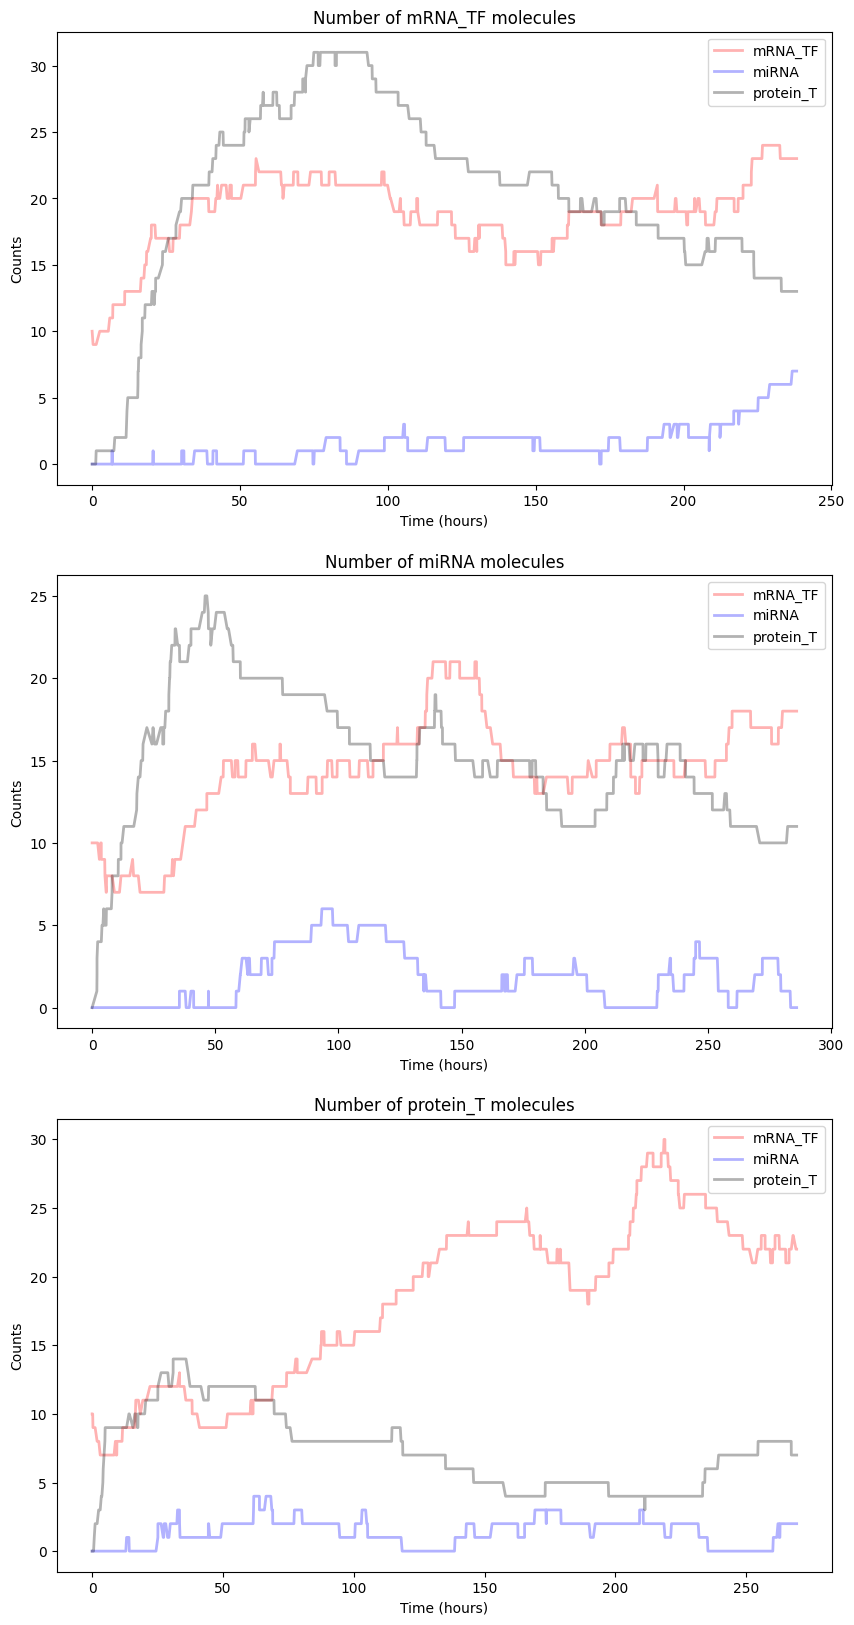

In [12]:
# Plot the simulated trajectories for each molecule type
fig, axs = plt.subplots(3, 1, figsize=(10,20))

molecule_type = ['mRNA_TF', 'miRNA', 'protein_T']
for i in range(3):
    axs[i].set_title(f'Number of {molecule_type[i]} molecules')
    axs[i].set_xlabel("Time (hours)")
    axs[i].set_ylabel("Counts")

# Plot each simulated trajectory
for i in range(time.shape[0]):
    axs[0].plot(time[i,:], species[molecule_type[0]][i,:], marker='', color='grey', linewidth=0.6, alpha=0.3)
    axs[1].plot(time[i,:],  species[molecule_type[1]][i,:], marker='', color='grey', linewidth=0.6, alpha=0.3)
    axs[2].plot(time[i,:],  species[molecule_type[2]][i,:], marker='', color='grey', linewidth=0.6, alpha=0.3)

plt.show()

# Let's also plot a few simulations
n2plot = 3
is2plot = np.random.choice(list(range(time.shape[0])), size=n2plot, replace=False)
fig, axs = plt.subplots(n2plot, 1, figsize=(10,20))

for i in range(n2plot):
    axs[i].set_title(f'Number of {molecule_type[i]} molecules')
    axs[i].set_xlabel("Time (hours)")
    axs[i].set_ylabel("Counts")
    axs[i].plot(time[i,:], species[molecule_type[0]][i,:], marker='', color='red', linewidth=2.0, alpha=0.3)
    axs[i].plot(time[i,:], species[molecule_type[1]][i,:], marker='', color='blue', linewidth=2.0, alpha=0.3)
    axs[i].plot(time[i,:], species[molecule_type[2]][i,:], marker='', color='black', linewidth=2.0, alpha=0.3)
    axs[i].legend(molecule_type)
plt.show()